In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 

In [113]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [114]:
df.shape

(1025, 14)

### Data Exploration (exploratory data analysis or EDA)

General checklist to follow during EDA

1. What question(s) you are trying to solve
2. What kind of data do we have and how do we treat different types
3. What's missing from the data and how do you deal with it
4. What are the outliers and why should you care about them
5. How can you add, change or remove features to get more out of your data

In [115]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

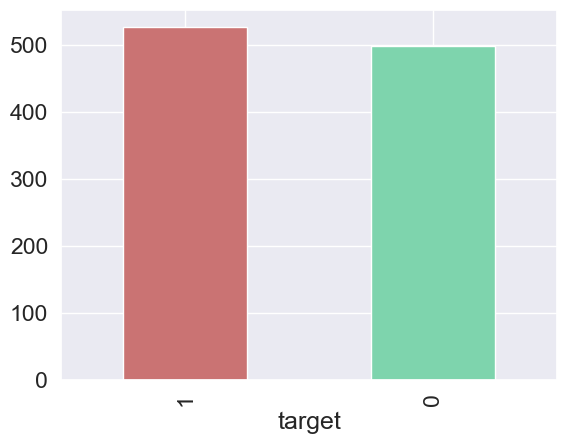

In [116]:
df["target"].value_counts().plot(kind="bar", color=["#CA7373", "#7ED4AD"]);

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [118]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [119]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [120]:
df["sex"].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [121]:
# Compare target column with sex column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


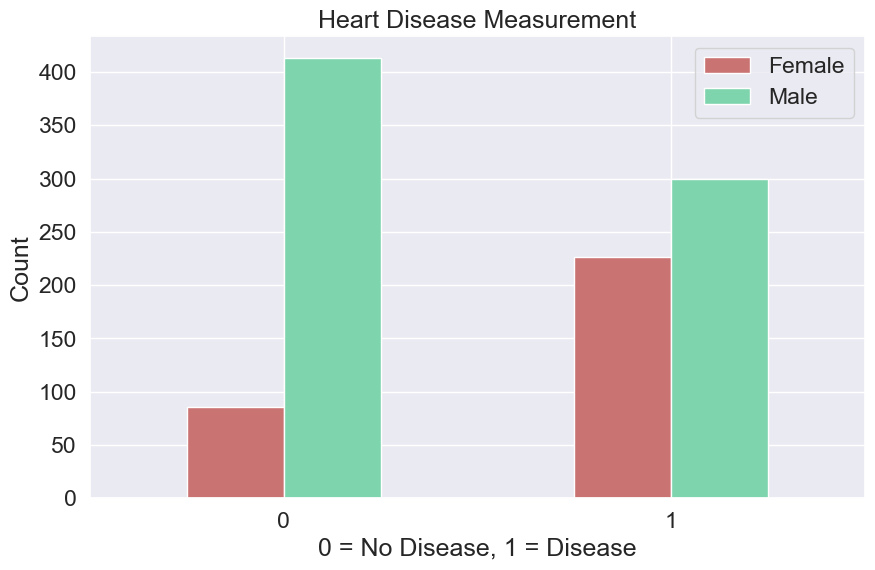

In [122]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["#CA7373", "#7ED4AD"])

plt.title("Heart Disease Measurement")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.show()

In [123]:
df["thalach"].value_counts()

thalach
162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: count, Length: 91, dtype: int64

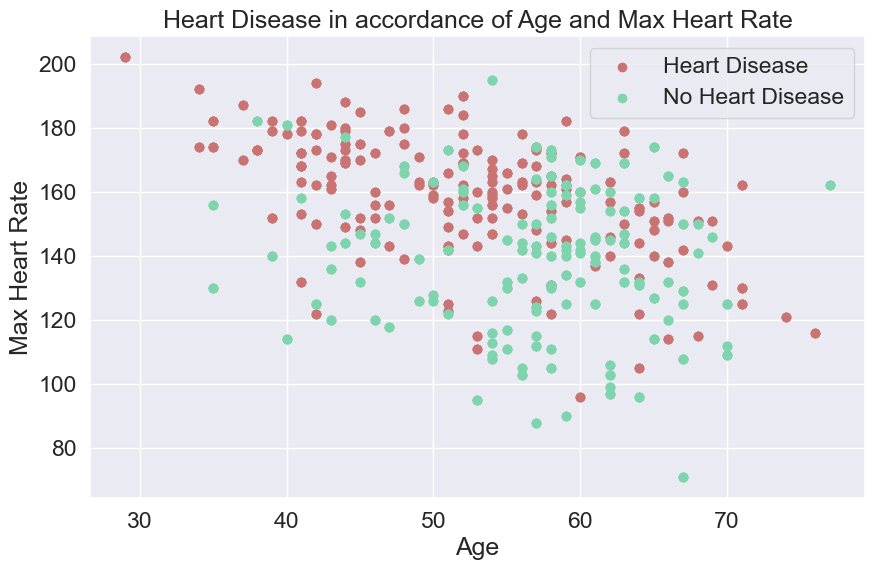

In [124]:
# thalach is Max Heart Rate

plt.figure(figsize=(10, 6))

plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color=["#CA7373"])

plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color=["#7ED4AD"])

plt.title("Heart Disease in accordance of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease", "No Heart Disease"])

plt.show()

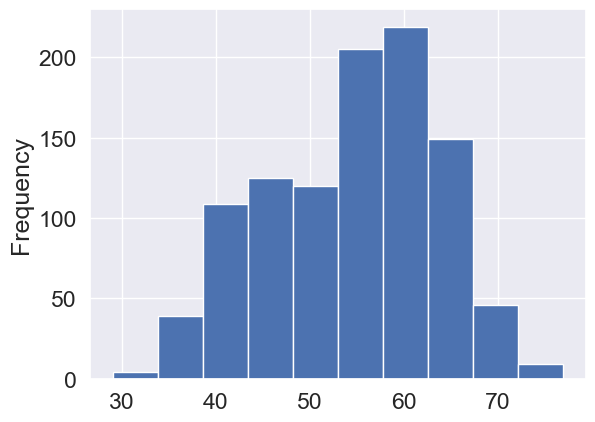

In [125]:
df.age.plot.hist();

In [126]:
# Chest Pain and Target Comparison

pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


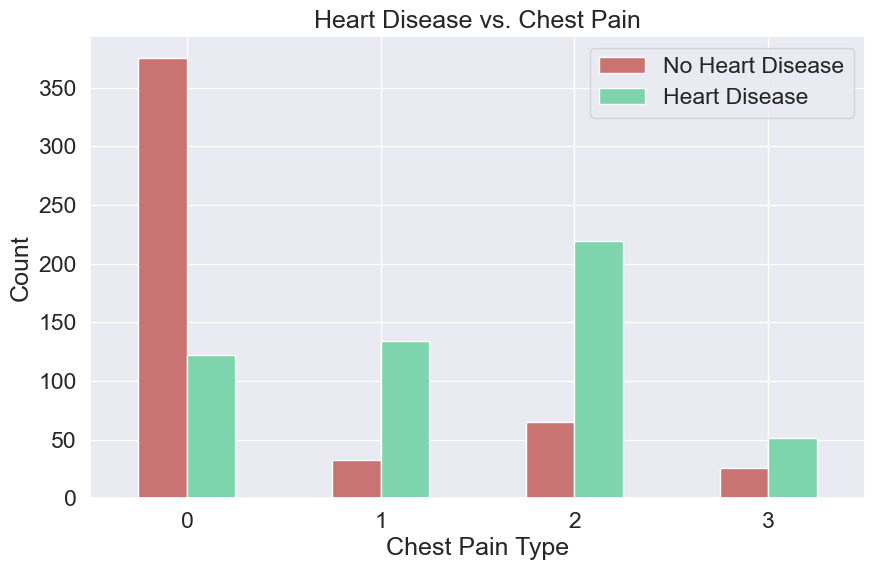

In [127]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), color=["#CA7373", "#7ED4AD"])
plt.title("Heart Disease vs. Chest Pain")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xticks(rotation=0)
plt.show()

In [128]:
# Correlation Matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


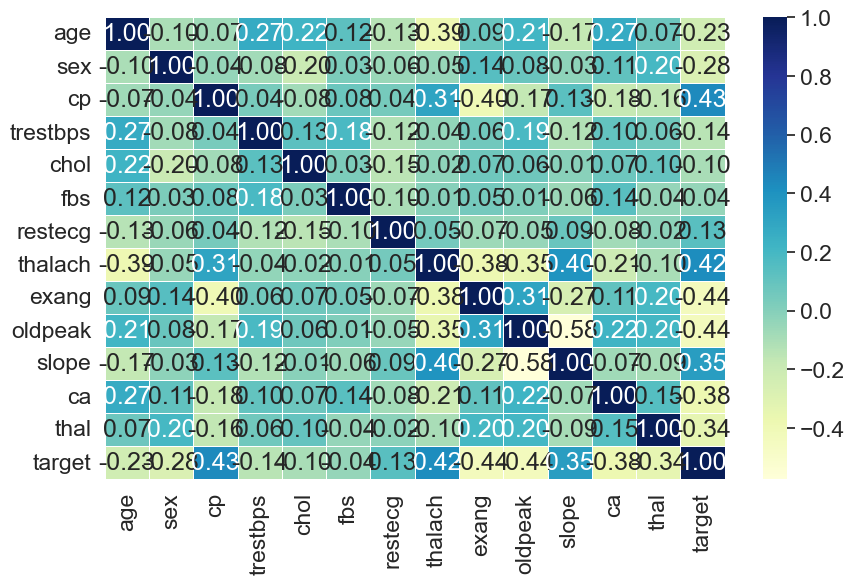

In [129]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

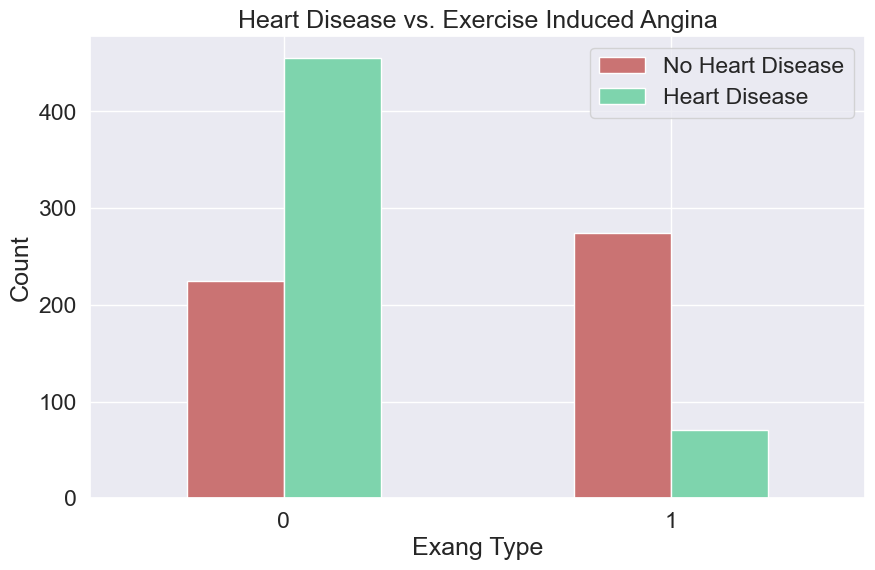

In [130]:
pd.crosstab(df.exang, df.target).plot(kind="bar", figsize=(10, 6), color=["#CA7373", "#7ED4AD"])
plt.title("Heart Disease vs. Exercise Induced Angina")
plt.xlabel("Exang Type")
plt.ylabel("Count")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xticks(rotation=0)
plt.show()

In [131]:
np.random.seed(42)

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [132]:
models = {
    "LogisticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)

    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [133]:
model_scores = fit_score(models, X_train, X_test, y_train, y_test)
model_scores

D:\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'RandomForestClassifier': 0.9853658536585366}

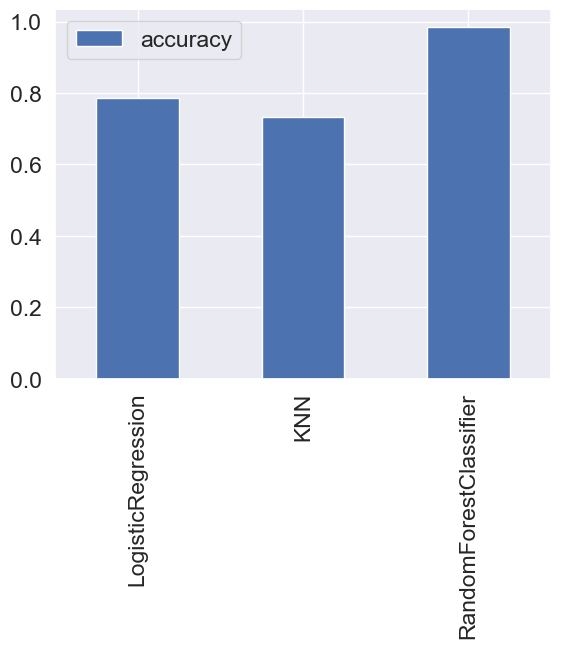

In [134]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [165]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [136]:
train_scores

[1.0,
 0.9963414634146341,
 0.9914634146341463,
 0.947560975609756,
 0.9231707317073171,
 0.8207317073170731,
 0.7914634146341464,
 0.7926829268292683,
 0.7670731707317073,
 0.7853658536585366,
 0.775609756097561,
 0.7695121951219512,
 0.7609756097560976,
 0.7817073170731708,
 0.7670731707317073,
 0.7670731707317073,
 0.75,
 0.7597560975609756,
 0.7634146341463415,
 0.7682926829268293]

In [137]:
test_scores

[0.9853658536585366,
 0.9560975609756097,
 0.9024390243902439,
 0.8097560975609757,
 0.7317073170731707,
 0.6878048780487804,
 0.6780487804878049,
 0.6682926829268293,
 0.7170731707317073,
 0.7170731707317073,
 0.6878048780487804,
 0.6780487804878049,
 0.6780487804878049,
 0.7170731707317073,
 0.7073170731707317,
 0.6926829268292682,
 0.6780487804878049,
 0.7073170731707317,
 0.7121951219512195,
 0.7170731707317073]

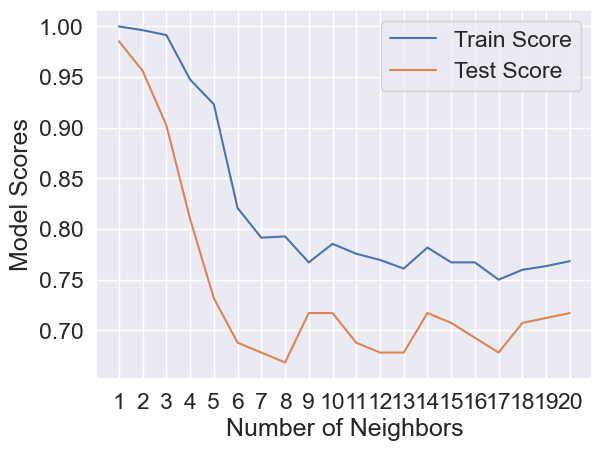

The max kNN model score on the test data is 98.54%


In [138]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Scores")
plt.legend()
plt.show()

print(f"The max kNN model score on the test data is {max(test_scores) * 100:.2f}%")

In [139]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rf_grid = {"n_estimator": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_sample_split": np.arange(2, 20, 2),
           "min_sample_leaf": np.arange(1, 20, 2)}

In [140]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [141]:
rs_log_reg.score(X_test, y_test)

0.7853658536585366

**It is either RandomForestClassifier or Tuned KNN with both at 98%**

In [142]:
# Trying to imporve it with GridSearchCV

log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [143]:
gs_log_reg.score(X_test, y_test)

0.7853658536585366

In [144]:
y_preds = knn.predict(X_test)
y_preds

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0], dtype=int64)

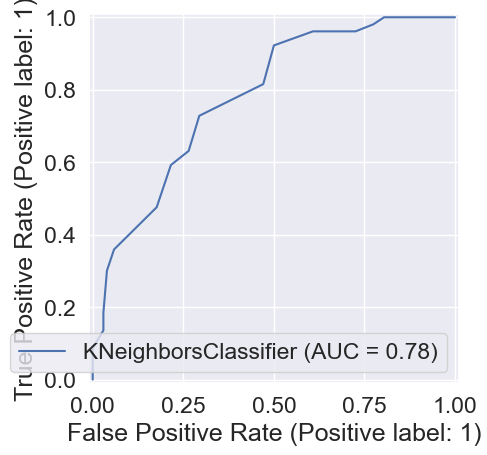

In [145]:
RocCurveDisplay.from_estimator(estimator=knn, X=X_test, y=y_test);

In [146]:
confusion_matrix(y_test, y_preds)

array([[72, 30],
       [28, 75]], dtype=int64)

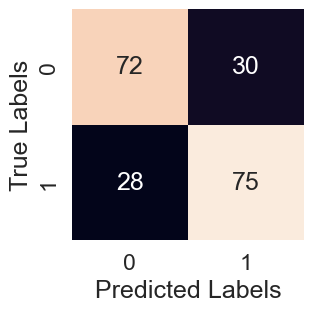

In [147]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):

    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

plot_conf_mat(y_test, y_preds)

In [149]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       102
           1       0.71      0.73      0.72       103

    accuracy                           0.72       205
   macro avg       0.72      0.72      0.72       205
weighted avg       0.72      0.72      0.72       205



In [158]:
knn_acc = cross_val_score(knn,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
knn_acc = np.mean(knn_acc)
print(knn_acc)

0.702439024390244


In [159]:
knn_precision = cross_val_score(knn,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
knn_precision = np.mean(knn_precision)
print(knn_precision)

0.7208746201371036


In [162]:
knn_recall = cross_val_score(knn,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
knn_recall = np.mean(knn_recall)
print(knn_recall)

0.6845103324348607


In [161]:
knn_f1 = cross_val_score(knn,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
knn_f1 = np.mean(knn_f1)
print(knn_f1)

0.7013395015628026


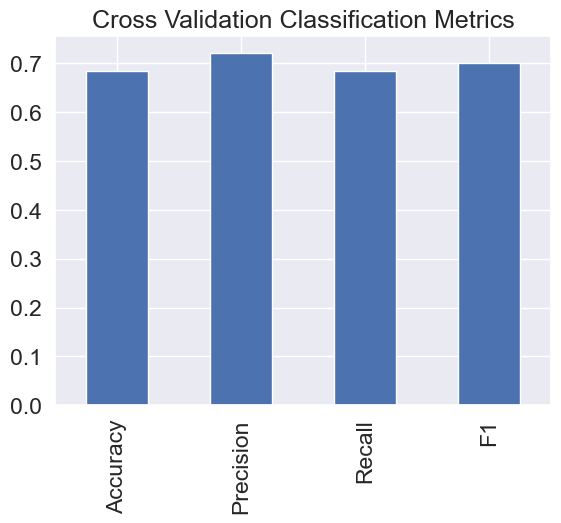

In [163]:
cv_metrics = pd.DataFrame({
    "Accuracy": knn_acc,
    "Precision": knn_precision,
    "Recall": knn_recall,
    "F1": knn_f1
}, index=[0])

cv_metrics.T.plot(kind="bar", title="Cross Validation Classification Metrics", legend=False);

### Finding Feature Importance

In [174]:
# Finding feature is not working with KNN hence I will be using Logistic Regression

clf = LogisticRegression(solver="liblinear", C=1.623776739188721)
clf.fit(X_train, y_train)

LogisticRegression(C=1.623776739188721, solver='liblinear')

In [175]:
clf.coef_

array([[ 0.01245358, -1.68571661,  0.85206522, -0.0157805 , -0.00828756,
        -0.20919279,  0.31969262,  0.03461762, -0.79622774, -0.65069512,
         0.56752778, -0.81540012, -1.04207879]])

In [176]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.012453579457653116,
 'sex': -1.6857166061434616,
 'cp': 0.8520652162233864,
 'trestbps': -0.015780504929232927,
 'chol': -0.008287555673300634,
 'fbs': -0.20919279164060847,
 'restecg': 0.31969261903282375,
 'thalach': 0.034617618325849954,
 'exang': -0.7962277362739606,
 'oldpeak': -0.6506951226345223,
 'slope': 0.5675277793479512,
 'ca': -0.8154001160372466,
 'thal': -1.042078785882631}

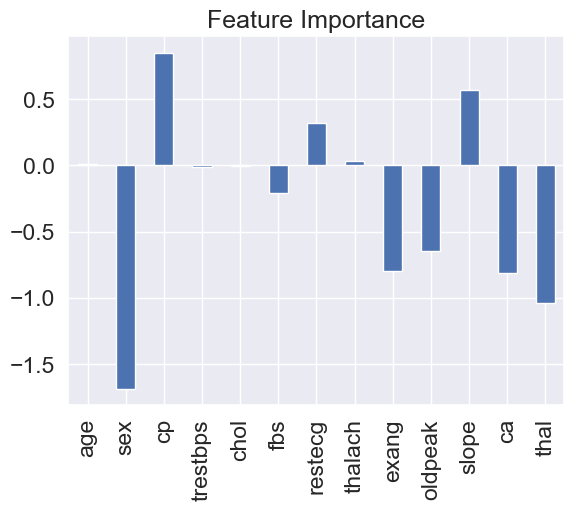

In [183]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);